In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
df_contour = pd.read_csv("tracker_output_contour.csv", names = ["x", "y", "t", "id"])
df_contour["ny"] = -df_contour.y

In [44]:
df_contour_panel = pd.read_csv("tracker_output_contour_panels.csv", names = ["x", "y", "t", "id"])
df_contour_panel["ny"] = -df_contour_panel.y

In [45]:
df_no_roi = pd.read_csv("tracker_output_roi_1000_2500_800_1900.csv", names = ["x", "y", "t", "id"])
df_no_roi["ny"] = -df_no_roi.y

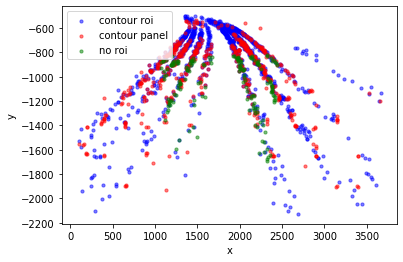

In [46]:
plt.scatter(df_contour['x'], df_contour['ny'], c='b', label='contour roi', s=10, alpha=0.5)
plt.scatter(df_contour_panel['x'], df_contour_panel['ny'], c='r', label='contour panel', s=10, alpha=0.5)
plt.scatter(df_no_roi['x'], df_no_roi['ny'], c='g', label='no roi', s=10, alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()

### Interpolate points

#### Add a column to indicate the point was detected

In [47]:
df_contour['status'] = 'detected'
df_contour_panel['status'] = 'detected'
df_no_roi['status'] = 'detected'

In [48]:
for i_d in df_contour.id.unique():
    recorded_times = df_contour.loc[df_contour['id']==i_d].t.values
    for i in range(min(recorded_times)+1,max(recorded_times)):
        if i not in recorded_times:
            df_contour = df_contour.append({'t':i, 'id':i_d, 'status':'not_detected'}, ignore_index=True)

for i_d in df_contour_panel.id.unique():
    recorded_times = df_contour_panel.loc[df_contour_panel['id']==i_d].t.values
    for i in range(min(recorded_times)+1,max(recorded_times)):
        if i not in recorded_times:
            df_contour_panel = df_contour_panel.append({'t':i, 'id':i_d, 'status':'not_detected'}, ignore_index=True)

for i_d in df_no_roi.id.unique():
    recorded_times = df_no_roi.loc[df_contour['id']==i_d].t.values
    for i in range(min(recorded_times)+1,max(recorded_times)):
        if i not in recorded_times:
            df_no_roi = df_no_roi.append({'t':i, 'id':i_d, 'status':'not_detected'}, ignore_index=True)

In [49]:
df_contour = df_contour.sort_values(by=['id','t'])
df_contour = df_contour.interpolate(method ='linear', limit_direction ='forward')

df_contour_panel = df_contour_panel.sort_values(by=['id','t'])
df_contour_panel = df_contour_panel.interpolate(method ='linear', limit_direction ='forward')

df_no_roi = df_no_roi.sort_values(by=['id','t'])
df_no_roi = df_no_roi.interpolate(method ='linear', limit_direction ='forward')

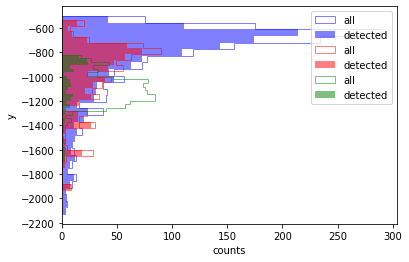

In [50]:
plt.hist(df_contour['ny'], bins=30, orientation='horizontal', alpha=0.5, label='all', color='blue', histtype='step')
plt.hist(df_contour[df_contour['status']=='detected']['ny'], bins=30, orientation='horizontal', alpha=0.5, label='detected', color='blue')

plt.hist(df_contour_panel['ny'], bins=30, orientation='horizontal', alpha=0.5, label='all', color='red', histtype='step')
plt.hist(df_contour_panel[df_contour_panel['status']=='detected']['ny'], bins=30, orientation='horizontal', alpha=0.5, label='detected', color='red')

plt.hist(df_no_roi['ny'], bins=30, orientation='horizontal', alpha=0.5, label='all', color='green', histtype='step')
plt.hist(df_no_roi[df_no_roi['status']=='detected']['ny'], bins=30, orientation='horizontal', alpha=0.5, label='detected', color='green')

plt.xlabel('counts')
plt.ylabel('y')
plt.legend()

In [51]:
contour_detected, bins = np.histogram(df_contour[df_contour['status']=='detected']['ny'], bins=20)
contour_all, _ = np.histogram(df_contour['ny'], bins=20)

contour_panel_detected, bins_ = np.histogram(df_contour_panel[df_contour_panel['status']=='detected']['ny'], bins=bins)
contour_panel_all, _ = np.histogram(df_contour_panel['ny'], bins=bins)

no_roi_detected, bins_ = np.histogram(df_no_roi[df_no_roi['status']=='detected']['ny'], bins=bins)
no_roi_all, _ = np.histogram(df_no_roi['ny'], bins=bins)

/Users/amandawhaley/anaconda3/envs/UrbanVision/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/Users/amandawhaley/anaconda3/envs/UrbanVision/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


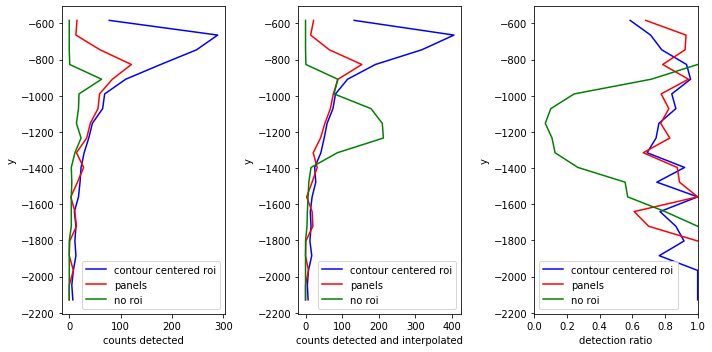

In [52]:
f = plt.figure(figsize=(10,5))

ax1 = f.add_subplot(1, 3, 1)
ax1.plot(contour_detected, bins[:-1], color='b', label='contour centered roi')
ax1.plot(contour_panel_detected, bins[:-1], color='r', label='panels')
ax1.plot(no_roi_detected, bins[:-1], color='g', label='no roi')
ax1.set_xlabel('counts detected')
ax1.set_ylabel('y')
ax1.legend()

ax2 = f.add_subplot(1,3,2)
ax2.plot(contour_all, bins[:-1], color='b', label='contour centered roi')
ax2.plot(contour_panel_all, bins[:-1], color='r', label='panels')
ax2.plot(no_roi_all, bins[:-1], color='g', label='no roi')
ax2.set_xlabel('counts detected and interpolated')
ax2.set_ylabel('y')
ax2.legend()

ax3 = f.add_subplot(1,3,3)
ax3.plot(contour_detected/contour_all, bins[:-1], color='b', label='contour centered roi')
ax3.plot(contour_panel_detected/contour_panel_all, bins[:-1], color='r', label='panels')
ax3.plot(no_roi_detected/no_roi_all, bins[:-1], color='g', label='no roi')
ax3.set_xlabel('detection ratio')
ax3.set_ylabel('y')
ax3.set_xlim(0,1)
ax3.legend()
plt.tight_layout()
plt.show()